In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
housing = fetch_california_housing(as_frame=True)


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Fetch the California housing dataset
data = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


In [3]:
from PSO_UQ import PSO_UQ
from GA_UQ import GA_UQ
PSO_fitnesses=[]
GA_instances=[]

In [4]:
import time as t
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
def trainAndreport(name,model):
    model.fit(X_train_scaled, y_train)
    
    ## Predict on training set
    #y_train_pred_scaled = model.predict(X_train_scaled)
    #y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1,1))
        
    ## Calculate R2 and RMSE for training set
    #train_r2 = r2_score(y_train, y_train_pred)
    #train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
        
    # Predict on test set
    y_test_pred = model.predict(X_test_scaled)
        
    # Calculate R2 and RMSE for test set
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    
    y_test_pred=np.reshape(y_test_pred,(y_test_pred.shape[0],))
    start_time=t.time()
    solution,solution_fitness, ga_instance=GA_UQ(y_test_pred,y_test)
    ga_duration=t.time()-start_time
    
    start_time=t.time()
    pos,cost,optimizer,fitness=PSO_UQ(y_test_pred,y_test)
    pso_duration=t.time()-start_time
    
    PSO_fitnesses.append(fitness)
    GA_instances.append(ga_instance)
    # Store results in a dictionary
    result = {
            "Model": name,
            #"Train R2": train_r2,
            #"Train RMSE": train_rmse,
            "R2": test_r2,
            "RMSE": test_rmse,
            "a_PSO":pos[0],
            "b_PSO":pos[1],
            "Fitness_PSO":cost*-1,
            "time_PSO":pso_duration,
            "a_GA":solution[0],
            "b_GA":solution[1],
            "Fitness_GA":solution_fitness,
            "time_GA":ga_duration
    }
    results.append(result)
    print(result)
    

In [5]:
results = []

In [6]:
from sklearn.linear_model import LinearRegression
trainAndreport("Linear Regression",LinearRegression())


c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:1160: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

{'Model': 'Linear Regression', 'R2': 0.5757877060324512, 'RMSE': 0.745581383012776, 'a_PSO': 1.1712057627205075, 'b_PSO': 0.5903836002259766, 'Fitness_PSO': 0.2409945718786059, 'time_PSO': 35.45258569717407, 'a_GA': 1.1835755975702367, 'b_GA': 0.6045041911218485, 'Fitness_GA': 0.24086649931557924, 'time_GA': 7.651120901107788}


In [7]:
from sklearn.svm import SVR
trainAndreport("SVR",SVR())


c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:1160: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

{'Model': 'SVR', 'R2': 0.6395821642629471, 'RMSE': 0.6872370536197738, 'a_PSO': 0.7944211128194354, 'b_PSO': 1.0423494518526657, 'Fitness_PSO': 0.2659302296556481, 'time_PSO': 37.565438985824585, 'a_GA': 0.7654226291300525, 'b_GA': 0.7136988278480216, 'Fitness_GA': 0.2725681069248842, 'time_GA': 8.381639957427979}


In [8]:
from sklearn.ensemble import RandomForestRegressor
trainAndreport("Random Forest", RandomForestRegressor(random_state=42))

c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:1160: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

{'Model': 'Random Forest', 'R2': 0.8043856726253765, 'RMSE': 0.5062951420508212, 'a_PSO': 0.965534408738165, 'b_PSO': 0.8039004484739678, 'Fitness_PSO': 0.3167913646097956, 'time_PSO': 37.53896498680115, 'a_GA': 0.6854442155955409, 'b_GA': 0.4791955272110604, 'Fitness_GA': 0.3356780152645539, 'time_GA': 7.937203645706177}


In [9]:
from sklearn.ensemble import GradientBoostingRegressor
trainAndreport("GradientBoostingRegressor", GradientBoostingRegressor(random_state=42))

c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:1160: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

{'Model': 'GradientBoostingRegressor', 'R2': 0.7752317337823644, 'RMSE': 0.5427138786462258, 'a_PSO': 0.3981811034769578, 'b_PSO': 1.3446258157671025, 'Fitness_PSO': 0.2497485918110222, 'time_PSO': 35.98368954658508, 'a_GA': 0.7822727456372736, 'b_GA': 0.5861728956854373, 'Fitness_GA': 0.30314185982566116, 'time_GA': 7.9864819049835205}


In [10]:
# Create a DataFrame to display results
results_df = pd.DataFrame(results)
results_df=results_df.round(3)
print(results_df)

                       Model     R2   RMSE  a_PSO  b_PSO  Fitness_PSO  \
0          Linear Regression  0.576  0.746  1.171  0.590        0.241   
1                        SVR  0.640  0.687  0.794  1.042        0.266   
2              Random Forest  0.804  0.506  0.966  0.804        0.317   
3  GradientBoostingRegressor  0.775  0.543  0.398  1.345        0.250   

   time_PSO   a_GA   b_GA  Fitness_GA  time_GA  
0    35.453  1.184  0.605       0.241    7.651  
1    37.565  0.765  0.714       0.273    8.382  
2    37.539  0.685  0.479       0.336    7.937  
3    35.984  0.782  0.586       0.303    7.986  


In [11]:
results_df["time_PSO"]=" "
results_df=results_df.drop("time_GA",axis=1)
print(results_df)

                       Model     R2   RMSE  a_PSO  b_PSO  Fitness_PSO  \
0          Linear Regression  0.576  0.746  1.171  0.590        0.241   
1                        SVR  0.640  0.687  0.794  1.042        0.266   
2              Random Forest  0.804  0.506  0.966  0.804        0.317   
3  GradientBoostingRegressor  0.775  0.543  0.398  1.345        0.250   

  time_PSO   a_GA   b_GA  Fitness_GA  
0           1.184  0.605       0.241  
1           0.765  0.714       0.273  
2           0.685  0.479       0.336  
3           0.782  0.586       0.303  


In [12]:

print(results_df.to_latex(index=False,float_format="{:.3f}".format))

\begin{tabular}{lrrrrrlrrr}
\toprule
Model & R2 & RMSE & a_PSO & b_PSO & Fitness_PSO & time_PSO & a_GA & b_GA & Fitness_GA \\
\midrule
Linear Regression & 0.576 & 0.746 & 1.171 & 0.590 & 0.241 &   & 1.184 & 0.605 & 0.241 \\
SVR & 0.640 & 0.687 & 0.794 & 1.042 & 0.266 &   & 0.765 & 0.714 & 0.273 \\
Random Forest & 0.804 & 0.506 & 0.966 & 0.804 & 0.317 &   & 0.685 & 0.479 & 0.336 \\
GradientBoostingRegressor & 0.775 & 0.543 & 0.398 & 1.345 & 0.250 &   & 0.782 & 0.586 & 0.303 \\
\bottomrule
\end{tabular}



#lower bound of alpha-cut is $a(\alpha-1)$
#upper bound of alpha-cut is $b(a-\alpha)$

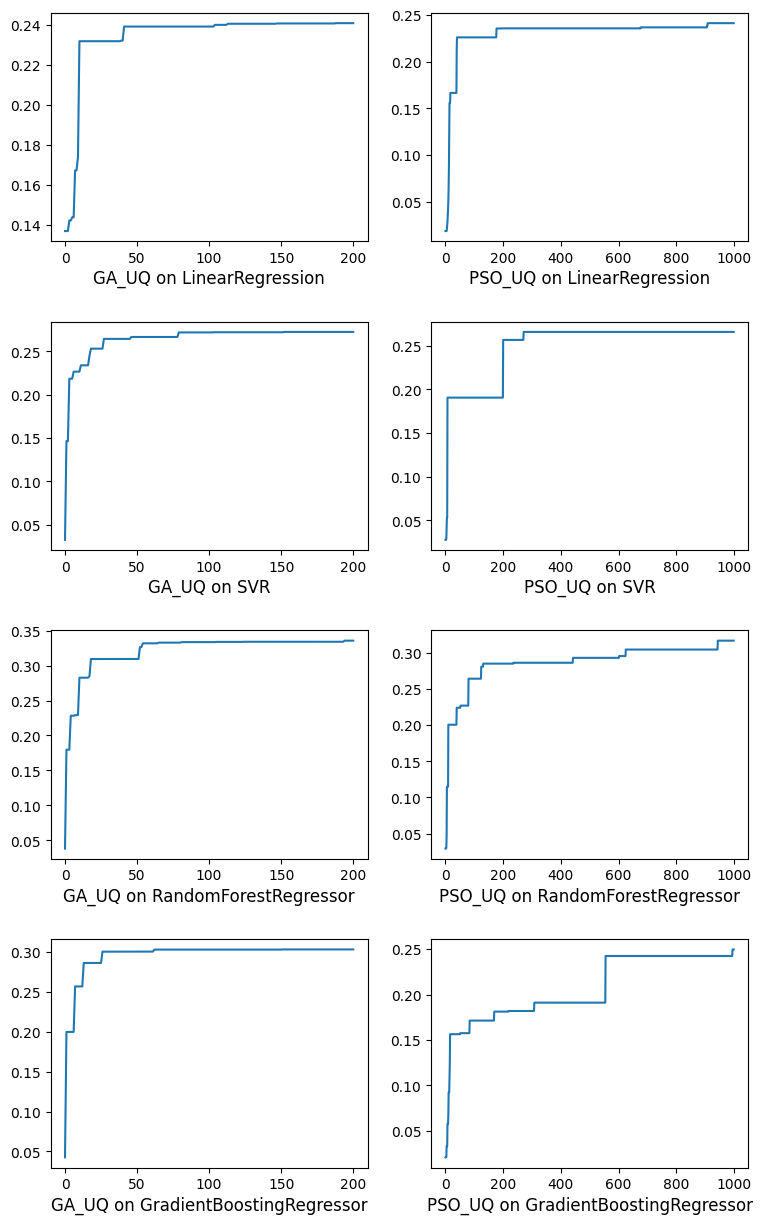

In [13]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(4,2,figsize=(9,15))
names=["LinearRegression","SVR","RandomForestRegressor","GradientBoostingRegressor"]
for i in range(4):
    y=np.maximum.accumulate(GA_instances[i].solutions_fitness)[::16]
    x=range(len(y))
    ax[i,0].plot(x,y)
    x=range(len(PSO_fitnesses[i]))
    y=PSO_fitnesses[i]
    ax[i,1].plot(x,y)
    ax[i,0].set_title("GA_UQ on "+names[i],y=-.22)
    ax[i,1].set_title("PSO_UQ on "+names[i],y=-.22)
plt.subplots_adjust(hspace=0.35)

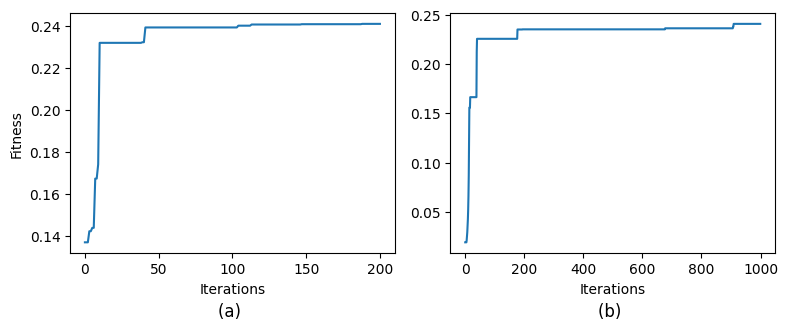

In [19]:
fig,ax=plt.subplots(1,2,figsize=(8,3.5))
names=["LinearRegression","SVR","RandomForestRegressor","GradientBoostingRegressor"]
i=0
y=np.maximum.accumulate(GA_instances[i].solutions_fitness)[::16]
x=range(len(y))
ax[0].plot(x,y)
x=range(len(PSO_fitnesses[i]))
y=PSO_fitnesses[i]
ax[1].plot(x,y)
ax[0].set_title("(a) ",y=-.3)
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Fitness")
ax[1].set_xlabel("Iterations")

ax[1].set_title("(b) ",y=-.3)
plt.tight_layout()
plt.savefig('linear_regression_optimize.pdf', dpi=300)  # Set DPI to 300 for higher quality
